## <p style="text-align: center;">Name: George Chen,   EID: gac2794</p>
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>


Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer

Mapping to challenges in the Domino guide:
1. Solve the right problem, but the world changes underneath you
2. Solve the right problem, but didn't realize that it had already been solved or can't reproduce it

I've heard some stories about the difficulties that a couple of MSBA students ran into during their capstone projects some years ago. About two months before the project deadline, the company that they were working with got purchased by Google. During the integration process, lawyers started swarming the office and blocked all outisde sources were denied access to the company database. Thus they had to switch to another project mid-semester.

The company that they switched to didn't really have a problem that they wanted to solve, and they pretty much just dumped the entire company database on the unfortunate students. The students worked dilligently to explain the patterns they found in the data, however during one of the project presentations, the company's finance director (who was visiting from headquarters) pointed out that the findings were clustered in a period of time where the company was sued by a rival, and they had to make changes to their database in response, thus the findings were trivial results.
   
The students finally did manage to finish their project and came up with exciting results, but had to overcome a lot of obstacles in the way. I hope to learn from their experiences and avoid similar situations for my capstone project.

# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


## Answer

1.) <br/>
$\mathscr{L}(p)$ = $\sum{X_ilog(p)}+(n-\sum{X_i})log(1-p)$
<br/>
<br/>
2.) <br/>
$\frac{\partial \mathscr{L}(p)}{\partial p}$ = $\frac{\sum{X_i}}{p}$ - $\frac{n-\sum{X_i}}{1-p}$ = 
$\frac{(1-p)\sum{X_i} - pn + p\sum{X_i}}{p(1-p)}$ = $\frac{\sum{X_i} - pn}{p(1-p)}$ = 0
<br/>
$p$ = $\frac{\sum{X_i}}{n}$
<br/>
<br/>
3.) <br/>
$E(\hat{p})$ = $E(\frac{\sum{X_i}}{n})$ = $\frac{1}{n}\sum E(X_i)$ = $\frac{1}{n}\sum p$ = $\frac{1}{n}(np)$ = $p$ <br/>
The estimate is unbiased.

# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = total_rooms/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [54]:
print(X.shape)
X.head(5)

(20433, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## (b)

In [55]:
reg = linear_model.LinearRegression().fit(X,Y)
print("Coefficients: ")
print(reg.coef_)
print()
print("MAE: ",mean_absolute_error(Y,reg.predict(X)))

Coefficients: 
[-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]

MAE:  50799.6307289529


## (c)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=11)
reg = linear_model.LinearRegression().fit(X_train,y_train)

print("Training set MAE: ", mean_absolute_error(y_train,reg.predict(X_train)))
print("Test set MAE: ", mean_absolute_error(y_test,reg.predict(X_test)))
print("Test sest MAE is higher than training set MAE.")

Training set MAE:  50749.10314465295
Test set MAE:  50916.74299435109
Test sest MAE is higher than training set MAE.


## (d)

In [57]:
df = X_train.corr(method="pearson")['households']
df[ df>0.9 ]

total_rooms       0.916556
total_bedrooms    0.979547
population        0.910283
households        1.000000
Name: households, dtype: float64

## (e)

In [58]:
X["average_bedrooms"] = X["total_bedrooms"]/X["households"]
X["average_rooms"] = X["total_rooms"]/X["households"]
X["average_population"] = X["population"]/X["households"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=11)
X_train.corr(method="pearson")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
average_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
average_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


Observation: 

Both the mean and standard deviations of the correlation values are lower for the new variables.

## (f)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=11)
reg = linear_model.LinearRegression().fit(X_train,y_train)

print("Training set MAE: ", mean_absolute_error(y_train,reg.predict(X_train)))
print("Test set MAE: ", mean_absolute_error(y_test,reg.predict(X_test)))

Training set MAE:  50474.268791457886
Test set MAE:  50783.974603927876


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
df4 = preprocessing.scale(X)
df4 = pd.DataFrame(df4)

X_train, X_test, y_train, y_test = train_test_split(df4,Y,test_size=0.30,random_state=11)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [61]:
import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

alphas = 10**np.linspace(10,-2,100)*0.5

lasso_alpha = []
k_fold = KFold(5)

for a in alphas:
    MAE = []
    for train,test in k_fold.split(X_train, y_train):
        lasso_cv = Lasso(alpha=a).fit(X_train.iloc[train],y_train.iloc[train])
        MAE.append(mean_absolute_error(y_train.iloc[test],lasso_cv.predict(X_train.iloc[test])))
    lasso_alpha.append((a, sum(MAE)/len(MAE)))

print("Best Alpha for Lasso: ", sorted(lasso_alpha,key=lambda x: x[1])[0][0])

ridge_alpha = []
k_fold = KFold(5)

for a in alphas:
    MAE = []
    for train,test in k_fold.split(X_train, y_train):
        ridge_cv = Ridge(alpha=a).fit(X_train.iloc[train],y_train.iloc[train])
        MAE.append(mean_absolute_error(y_train.iloc[test],ridge_cv.predict(X_train.iloc[test])))
    ridge_alpha.append((a, sum(MAE)/len(MAE)))

print("Best Alpha for Ridge: ", sorted(ridge_alpha,key=lambda x: x[1])[0][0])

Best Alpha for Lasso:  0.005
Best Alpha for Ridge:  37.823166377731454


## 2

Populating the interactive namespace from numpy and matplotlib


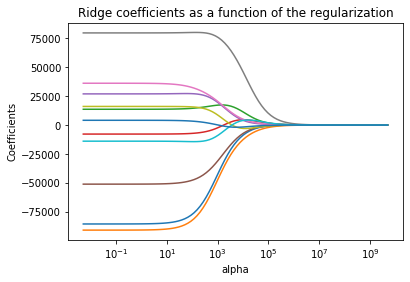

In [62]:
%pylab inline
#Plotting ridge coefficents as a function of the regularization
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a,fit_intercept=True)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

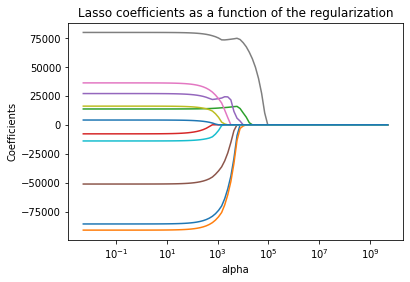

In [63]:
#Plotting lasso coefficents as a function of the regularization
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,fit_intercept=True)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

## 3

In [64]:
lsr = linear_model.LinearRegression().fit(X_train,y_train)
print("Test set MAE for least squares regression: \n",mean_absolute_error(y_test,lsr.predict(X_test)))
print()

lasso = Lasso(alpha=sorted(lasso_alpha,key=lambda x: x[1])[0][0])
lasso.fit(X_train,y_train)
print("Test set MAE for Lasso regression: \n",mean_absolute_error(y_test,lasso.predict(X_test)))
print()

ridge = Ridge(alpha=sorted(ridge_alpha,key=lambda x: x[1])[0][0])
ridge.fit(X_train,y_train)
print("Test set MAE for Ridge regression: \n",mean_absolute_error(y_test,ridge.predict(X_test)))
print()

Test set MAE for least squares regression: 
 50783.97460392802

Test set MAE for Lasso regression: 
 50783.97366936819

Test set MAE for Ridge regression: 
 50730.71430765993



## 4

In [65]:
#Fitting LassoCV
lasso = LassoCV(alphas=None, cv=10, max_iter=10000).fit(X_train,y_train)

In [66]:
#Print the alpha parameter obtained above
print(lasso.alpha_)

231.95068268703898


In [67]:
#Fit lasso using the above alpha and report MAE on Test.
lm = Lasso(alpha=lasso.alpha_).fit(X_train,y_train)
print("Coefficients: \n",lm.coef_)
print()
print("Test set MAE: ",mean_absolute_error(y_test,lm.predict(X_test)))

Coefficients: 
 [-83133.93102347 -88517.58007868  13846.00059688  -4639.43482311
  24830.93596347 -48918.91577675  33213.52173788  78668.9544846
  14609.12298305 -12725.83028059   3148.63726689]

Test set MAE:  50765.09711706191


## 5

## Answer
We scale the data because the scale of the variables affect how much regularizaiton will be applied to a specific variable.
For example, if one variable has a very large scale, then regularization will have little effect on this varible.

# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer

The training set performance increases as we increase the number of examples in the training set,
the test set performance initially increases, but will start to drop when the number of examples becomes too large.
The reason of the drop is that the model starts chasing the noise in the training set and overfits the data, which causes test set performance to suffer. 